Первые 5 строк датасета:
   age  gender region income_level  hypertension  diabetes  cholesterol_level  \
0   60    Male  Rural       Middle             0         1                211   
1   53  Female  Urban          Low             0         0                208   
2   62  Female  Urban          Low             0         0                231   
3   73    Male  Urban          Low             1         0                202   
4   52    Male  Urban       Middle             1         0                232   

   obesity  waist_circumference  family_history  ... blood_pressure_diastolic  \
0        0                   83               0  ...                       62   
1        0                  106               1  ...                       76   
2        1                  112               1  ...                       74   
3        0                   82               1  ...                       65   
4        0                   89               0  ...                       75   

 

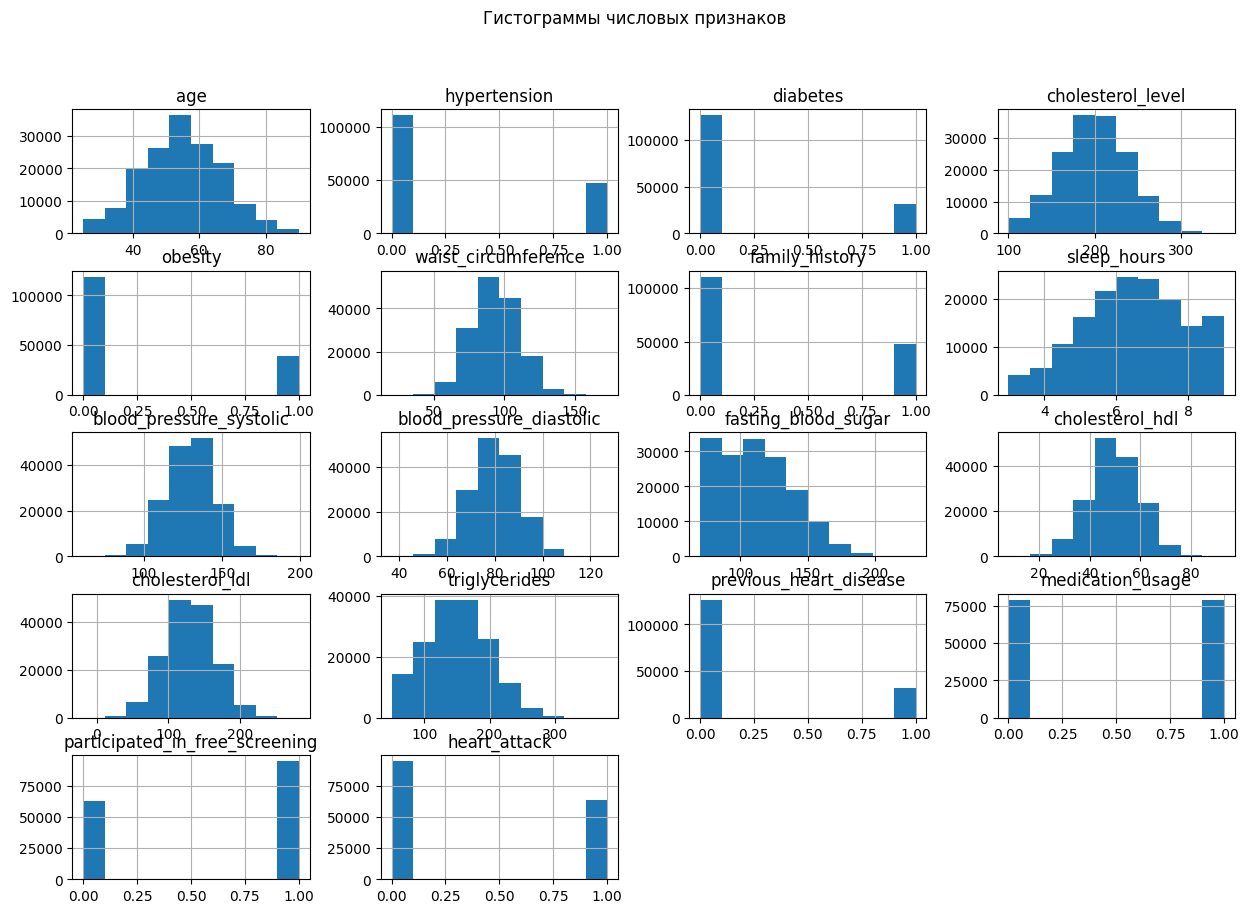

<ipython-input-7-3c9d81cb5f02>:48: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column] = data[column].replace(mapping)



Матрица корреляции:
                                     age    gender    region  income_level  \
age                             1.000000 -0.002161 -0.002219      0.001422   
gender                         -0.002161  1.000000  0.002377     -0.000750   
region                         -0.002219  0.002377  1.000000     -0.000716   
income_level                    0.001422 -0.000750 -0.000716      1.000000   
hypertension                   -0.000512 -0.000572  0.000103      0.001990   
diabetes                        0.003616 -0.000205 -0.003261     -0.001651   
cholesterol_level              -0.003747 -0.001459  0.000679     -0.004100   
obesity                        -0.001556 -0.001443  0.002103      0.000936   
waist_circumference             0.001601  0.000255  0.004291      0.002938   
family_history                  0.001046  0.001456  0.002403      0.005040   
smoking_status                 -0.002668  0.001173 -0.006103     -0.004396   
physical_activity               0.001055  0

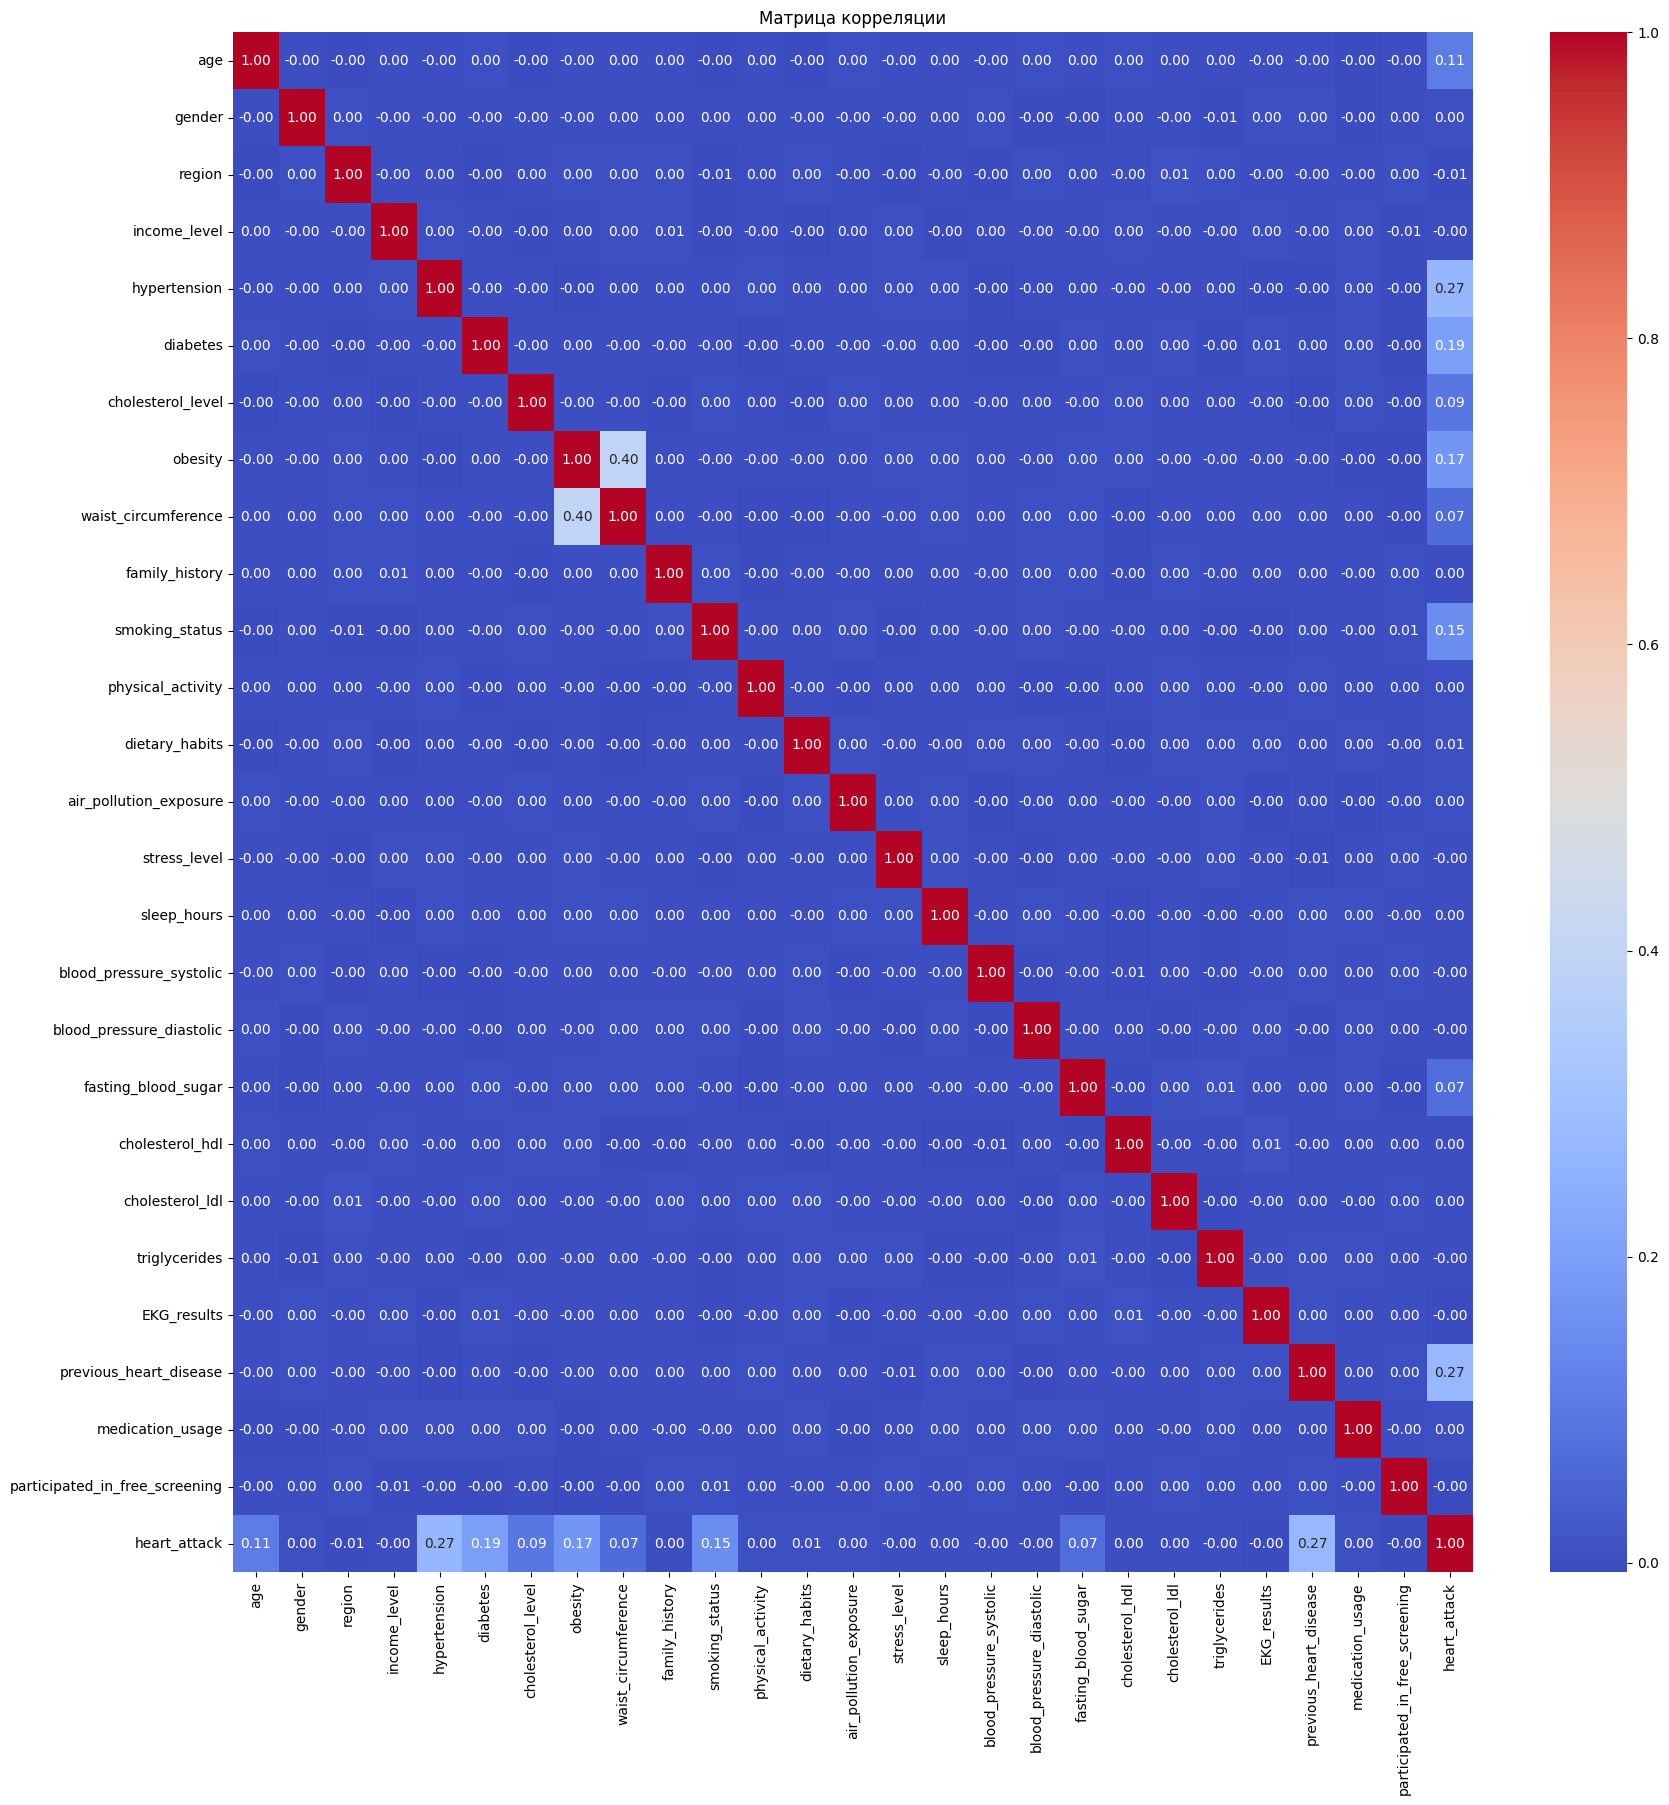

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('heart_attack_prediction_indonesia.csv')

print("Первые 5 строк датасета:")
print(data.head())

print("\nИнформация о датасете:")
print(data.info())

print("\nПропущенные значения:")
print(data.isnull().sum())

numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    if data[col].isnull().any():
        median_value = data[col].median()
        data[col].fillna(median_value, inplace=True)

duplicates = data.duplicated().sum()
print(f"\nКоличество дубликатов: {duplicates}")

print("\nОписательная статистика числовых признаков:")
print(data.describe())

data.hist(figsize=(15, 10))
plt.suptitle("Гистограммы числовых признаков")
plt.show()


label_maps = {
    'gender': {'Male': 0, 'Female': 1},
    'region': {'Rural': 0, 'Urban': 1},
    'income_level': {'Low': 0, 'Middle': 1, 'High': 2},
    'smoking_status': {'Never': 0, 'Past': 1, 'Current': 2},
    'physical_activity': {'Low': 0, 'Moderate': 1, 'High': 2},
    'dietary_habits': {'Unhealthy': 0, 'Healthy': 1},
    'air_pollution_exposure': {'Low': 0, 'Moderate': 1, 'High': 2},
    'stress_level': {'Low': 0, 'Moderate': 1, 'High': 2},
    'EKG_results': {'Normal': 0, 'Abnormal': 1}
}

for column, mapping in label_maps.items():
    if column in data.columns:
        data[column] = data[column].replace(mapping)

print("\nМатрица корреляции:")
print(data.select_dtypes(include=[np.number]).corr())

plt.figure(figsize=(20, 20))
sns.heatmap(data.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Матрица корреляции")
plt.show()



Удалены следующие столбцы: family_history, gender, region, income_level, family_history, physical_activity, dietary_habits, air_pollution_exposure, stress_level, sleep_hours, blood_pressure_systolic, blood_pressure_diastolic, cholesterol_hdl, cholesterol_ldl, triglycerides, medication_usage, participated_in_free_screening, alcohol_consumption, EKG_results

Матрица корреляции:
                             age  hypertension  diabetes  cholesterol_level  \
age                     1.000000     -0.000512  0.003616          -0.003747   
hypertension           -0.000512      1.000000 -0.001329          -0.001085   
diabetes                0.003616     -0.001329  1.000000          -0.001019   
cholesterol_level      -0.003747     -0.001085 -0.001019           1.000000   
obesity                -0.001556     -0.002454  0.001720          -0.000630   
waist_circumference     0.001601      0.000724 -0.001773          -0.000419   
smoking_status         -0.002668      0.000796 -0.000158           

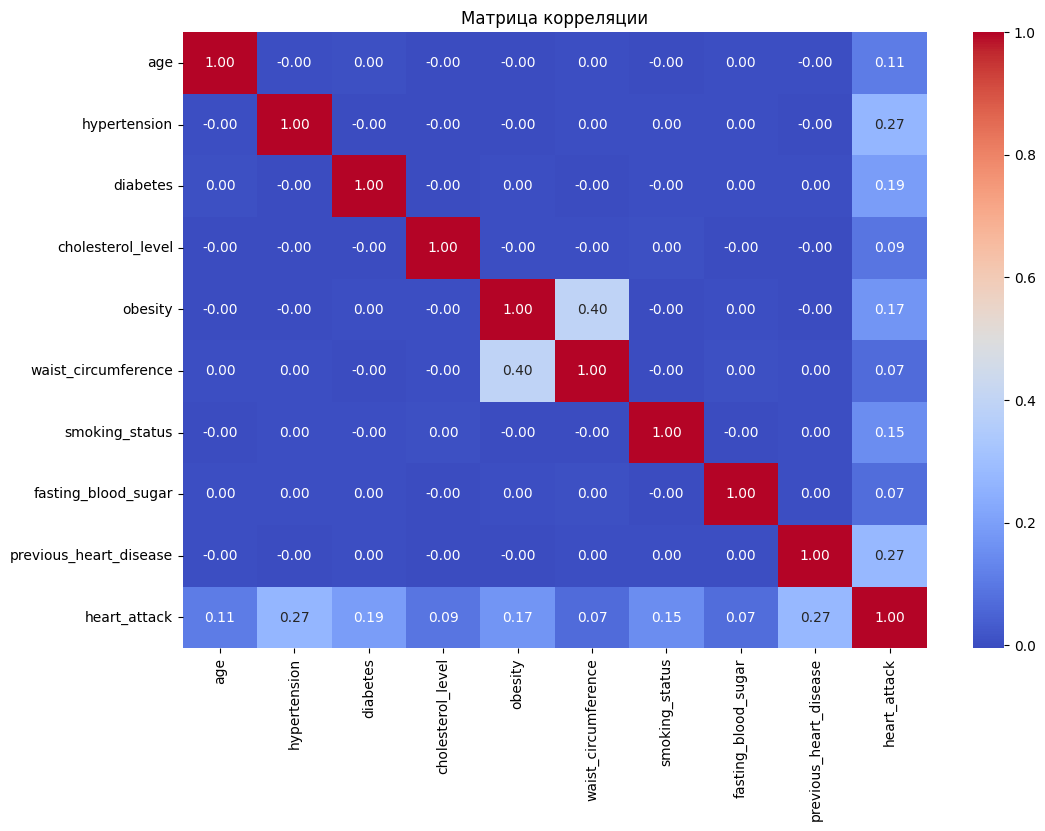

In [ ]:
columns_to_drop = [
    'family_history',
    'gender',
    'region',
    'income_level',
    'family_history',
    'physical_activity',
    'dietary_habits',
    'air_pollution_exposure',
    'stress_level',
    'sleep_hours',
    'blood_pressure_systolic',
    'blood_pressure_diastolic',
    'cholesterol_hdl',
    'cholesterol_ldl',
    'triglycerides',
    'medication_usage',
    'participated_in_free_screening',
    'alcohol_consumption',
    'EKG_results'
]

existing_columns = [col for col in columns_to_drop if col in data.columns]
if existing_columns:
    data = data.drop(columns=existing_columns)
    print(f"\nУдалены следующие столбцы: {', '.join(existing_columns)}")
else:
    print("\nУказанные столбцы отсутствуют в датасете.")

data.to_csv('processed_heart_attack_prediction.csv', index=False)

print("\nМатрица корреляции:")
print(data.select_dtypes(include=[np.number]).corr())

plt.figure(figsize=(12, 8))
sns.heatmap(data.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Матрица корреляции")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

data = pd.read_csv('processed_heart_attack_prediction.csv')

X = data.drop('heart_attack', axis=1)
y = data['heart_attack']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Линейная регрессия

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

MSE: 0.1762
MAE: 0.3578
R²: 0.2660


In [ ]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nВажность признаков:")
print(coefficients)


Важность признаков:
                  Feature  Coefficient
8  previous_heart_disease     0.136733
1            hypertension     0.131588
2                diabetes     0.094468
4                 obesity     0.084424
6          smoking_status     0.073186
0                     age     0.052641
3       cholesterol_level     0.046748
7     fasting_blood_sugar     0.033711
5     waist_circumference    -0.000810


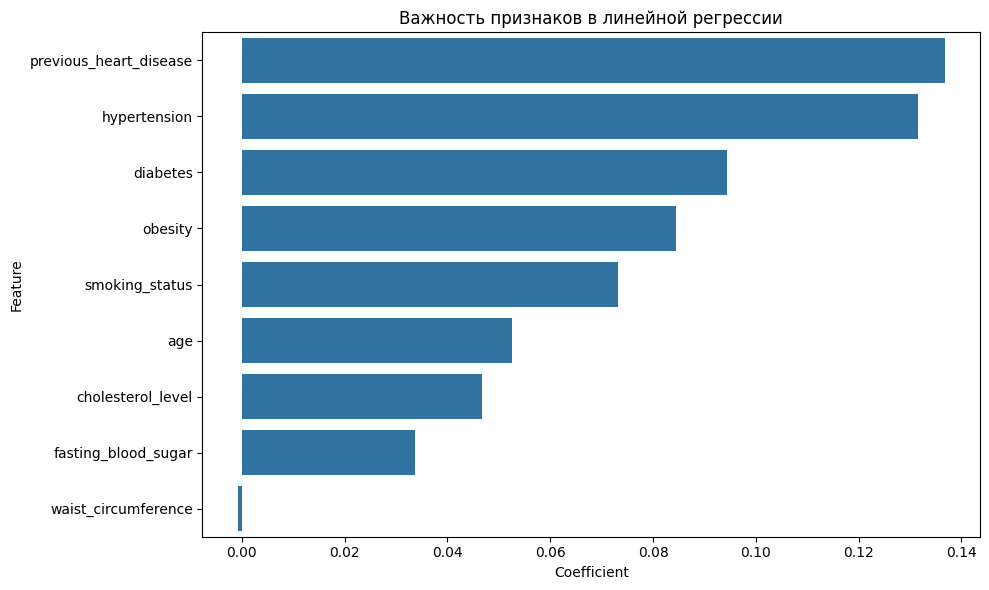

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Важность признаков в линейной регрессии')
plt.tight_layout()
plt.show()

Логистическая регрессия

In [ ]:
y_train_bin = y_train.round().astype(int)
y_test_bin = y_test.round().astype(int)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train_bin)
y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]

In [ ]:
accuracy = accuracy_score(y_test_bin, y_pred_logreg)
precision = precision_score(y_test_bin, y_pred_logreg)
recall = recall_score(y_test_bin, y_pred_logreg)
f1 = f1_score(y_test_bin, y_pred_logreg)
roc_auc = roc_auc_score(y_test_bin, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

Accuracy: 0.7299
Precision: 0.6918
Recall: 0.5866
F1-Score: 0.6349
ROC-AUC: 0.8005


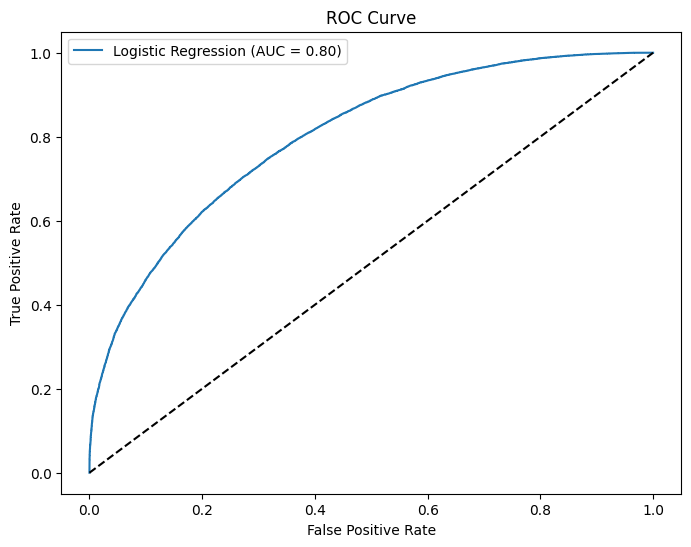

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
logreg_coef = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nВажность признаков в логистической регрессии:")
print(logreg_coef)


Важность признаков в логистической регрессии:
                  Feature  Coefficient
8  previous_heart_disease     0.719050
1            hypertension     0.695457
2                diabetes     0.507632
4                 obesity     0.458248
6          smoking_status     0.406852
0                     age     0.299377
3       cholesterol_level     0.265385
7     fasting_blood_sugar     0.190336
5     waist_circumference    -0.003925


Lasso и Ridge регрессия

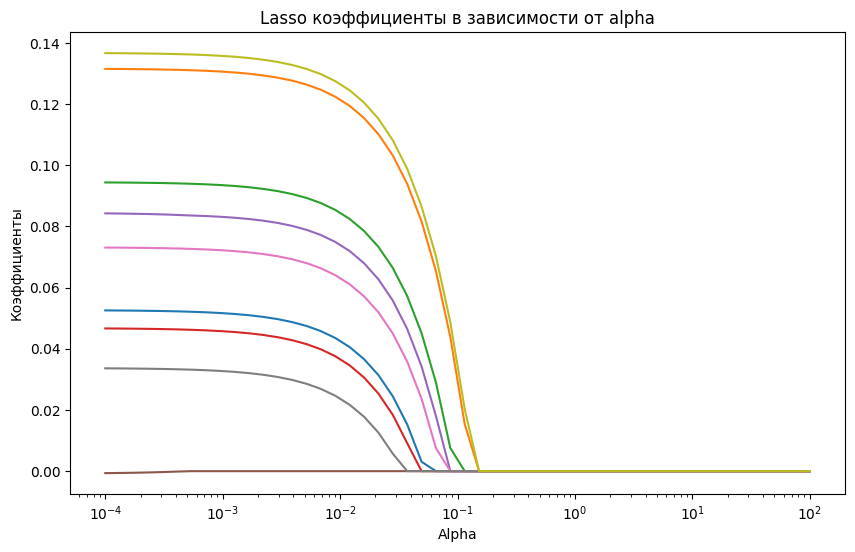

In [ ]:
alphas = np.logspace(-4, 2, 50)
lasso_coefs = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    lasso_coefs.append(lasso.coef_)

plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.plot(alphas, lasso_coefs)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Коэффициенты')
plt.title('Lasso коэффициенты в зависимости от alpha')
plt.axis('tight')
plt.show()


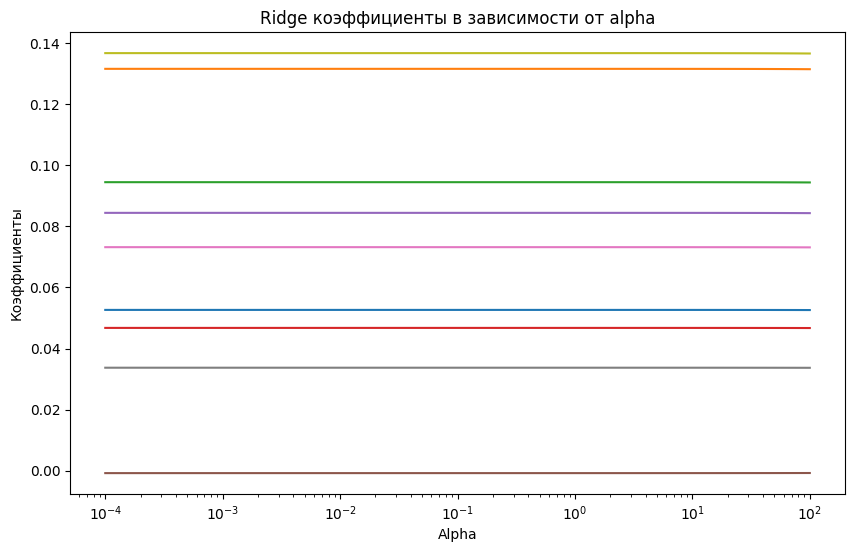

In [ ]:
ridge_coefs = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    ridge_coefs.append(ridge.coef_)

plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.plot(alphas, ridge_coefs)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Коэффициенты')
plt.title('Ridge коэффициенты в зависимости от alpha')
plt.axis('tight')
plt.show()

In [ ]:
best_alpha = 0.1

lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

print("\nСравнение моделей:")
print(f"Linear Regression R²: {r2_score(y_test, y_pred_lr):.4f}")
print(f"Lasso Regression R²: {r2_score(y_test, y_pred_lasso):.4f}")
print(f"Ridge Regression R²: {r2_score(y_test, y_pred_ridge):.4f}")



Сравнение моделей:
Linear Regression R²: 0.2660
Lasso Regression R²: 0.0648
Ridge Regression R²: 0.2660


In [ ]:
coef_comparison = pd.DataFrame({
    'Feature': X.columns,
    'Linear': lr.coef_,
    'Lasso': lasso.coef_,
    'Ridge': ridge.coef_
})

print("\nСравнение коэффициентов:")
print(coef_comparison)


Сравнение коэффициентов:
                  Feature    Linear     Lasso     Ridge
0                     age  0.052641  0.000000  0.052641
1            hypertension  0.131588  0.030590  0.131588
2                diabetes  0.094468  0.000000  0.094468
3       cholesterol_level  0.046748  0.000000  0.046748
4                 obesity  0.084424  0.000000  0.084423
5     waist_circumference -0.000810  0.000000 -0.000810
6          smoking_status  0.073186  0.000000  0.073186
7     fasting_blood_sugar  0.033711  0.000000  0.033711
8  previous_heart_disease  0.136733  0.035469  0.136733


lasso(L1) и ridge(L2) для логистической регрессии

In [ ]:
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
logreg_l1.fit(X_train_scaled, y_train_bin)
y_pred_l1 = logreg_l1.predict(X_test_scaled)
y_pred_proba_l1 = logreg_l1.predict_proba(X_test_scaled)[:, 1]

print("Logistic Regression (L1):")
print(f"Accuracy: {accuracy_score(y_test_bin, y_pred_l1):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test_bin, y_pred_proba_l1):.4f}")

Logistic Regression (L1):
Accuracy: 0.7299
ROC-AUC: 0.8005


In [ ]:
logreg_l2 = LogisticRegression(penalty='l2', max_iter=1000)
logreg_l2.fit(X_train_scaled, y_train_bin)
y_pred_l2 = logreg_l2.predict(X_test_scaled)
y_pred_proba_l2 = logreg_l2.predict_proba(X_test_scaled)[:, 1]

print("\nLogistic Regression (L2):")
print(f"Accuracy: {accuracy_score(y_test_bin, y_pred_l2):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test_bin, y_pred_proba_l2):.4f}")


Logistic Regression (L2):
Accuracy: 0.7299
ROC-AUC: 0.8005


In [ ]:
coef_logreg_comparison = pd.DataFrame({
    'Feature': X.columns,
    'LogReg': logreg.coef_[0],
    'LogReg_L1': logreg_l1.coef_[0],
    'LogReg_L2': logreg_l2.coef_[0]
})

print("\nСравнение коэффициентов логистической регрессии:")
print(coef_logreg_comparison)


Сравнение коэффициентов логистической регрессии:
                  Feature    LogReg  LogReg_L1  LogReg_L2
0                     age  0.299377   0.299286   0.299377
1            hypertension  0.695457   0.695148   0.695457
2                diabetes  0.507632   0.507432   0.507632
3       cholesterol_level  0.265385   0.265348   0.265385
4                 obesity  0.458248   0.458570   0.458248
5     waist_circumference -0.003925  -0.004420  -0.003925
6          smoking_status  0.406852   0.406728   0.406852
7     fasting_blood_sugar  0.190336   0.190201   0.190336
8  previous_heart_disease  0.719050   0.718715   0.719050


Модель Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Random Forest Metrics:
Accuracy: 0.7172
Precision: 0.6660
Recall: 0.5894
F1-Score: 0.6253
ROC-AUC: 0.7918


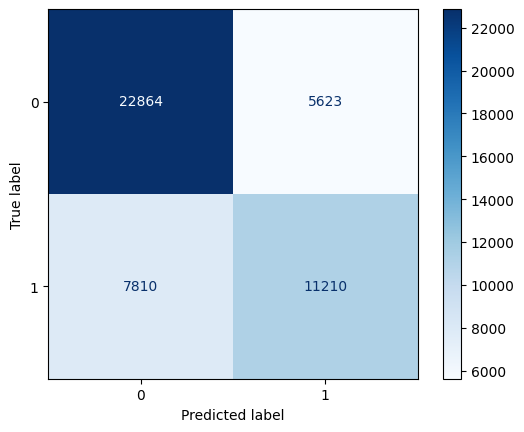

In [ ]:
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

cm = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Metrics:")
# Доля правильных предсказаний среди всех предсказаний.
print(f"Accuracy: {accuracy_rf:.4f}")
# доля истинно положительных предсказаний среди всех предсказанных как положительные.
print(f"Precision: {precision_rf:.4f}")
# доля истинно положительных предсказаний среди всех реальных положительных случаев.
print(f"Recall: {recall_rf:.4f}")
# Гармоническое среднее между Precision и Recall.
print(f"F1-Score: {f1_rf:.4f}")
print(f"ROC-AUC: {roc_auc_rf:.4f}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()


Модель XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:25:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)


XGBoost Metrics:
Accuracy: 0.7327
Precision: 0.6853
Recall: 0.6147
F1-Score: 0.6481
ROC-AUC: 0.8126


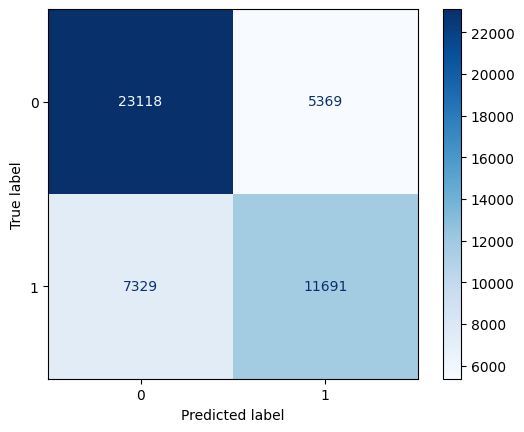

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

cm = confusion_matrix(y_test, y_pred_xgb)

print("\nXGBoost Metrics:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")
print(f"ROC-AUC: {roc_auc_xgb:.4f}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

XGBoost Metrics:
Accuracy: 0.7327
Precision: 0.6853
Recall: 0.6147
F1-Score: 0.6481
ROC-AUC: 0.8126

Random Forest Metrics:
Accuracy: 0.7172
Precision: 0.6660
Recall: 0.5894
F1-Score: 0.6253
ROC-AUC: 0.7918


7 лаба
---------------

In [ ]:
pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.2 MB/s eta 0:00:00


In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 10.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Integer, Real
import time

df = pd.read_csv("processed_heart_attack_prediction.csv")

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [50, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

start_time = time.time()

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("GridSearchCV best params:", grid_search.best_params_)
print("GridSearchCV Accuracy:", accuracy_score(y_test, grid_search.predict(X_test)))
print("Time taken:", time.time() - start_time, "seconds")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
GridSearchCV best params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
GridSearchCV Accuracy: 0.7290625
Time taken: 153.7909233570099 seconds


In [ ]:
param_grid = {
    'n_estimators': [50, 200],
    'max_depth': [5, 10],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0], # доля данных для обучения одного дерева
    'colsample_bytree': [0.7, 1.0] # доля признаков для построения дерева
}

start_time = time.time()

grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("GridSearchCV best params:", grid_search.best_params_)
print("GridSearchCV Accuracy:", accuracy_score(y_test, grid_search.predict(X_test)))
print("Time taken:", time.time() - start_time, "seconds")

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:03:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV best params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
GridSearchCV Accuracy: 0.73171875
Time taken: 43.683945417404175 seconds


In [ ]:
from scipy.stats import randint, uniform

param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2'] # способ выбора признаков на каждом шаге
}

start_time = time.time()

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=30,  # количество комбинаций
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

print("RandomizedSearchCV best params:", random_search.best_params_)
print("RandomizedSearchCV Accuracy:", accuracy_score(y_test, random_search.predict(X_test)))
print("Time taken:", time.time() - start_time, "seconds")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
RandomizedSearchCV best params: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 90}
RandomizedSearchCV Accuracy: 0.7296875
Time taken: 193.66132473945618 seconds


In [ ]:
from scipy.stats import uniform, randint

param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.5, 0.5),
    'min_child_weight': randint(1, 6)
}

start_time = time.time()

random_search = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_distributions=param_dist,
    n_iter=30,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

print("RandomizedSearchCV best params:", random_search.best_params_)
print("RandomizedSearchCV Accuracy:", accuracy_score(y_test, random_search.predict(X_test)))
print("Time taken:", time.time() - start_time, "seconds")

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:07:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV best params: {'colsample_bytree': np.float64(0.6481367528520412), 'learning_rate': np.float64(0.05958008171890075), 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 137, 'subsample': np.float64(0.7579526072702278)}
RandomizedSearchCV Accuracy: 0.73
Time taken: 52.428563594818115 seconds


In [ ]:
opt_space = {
    'n_estimators': Integer(50, 200),
    'max_depth': Integer(5, 10),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 5),
    'max_features': ['sqrt', 'log2']
}

start_time = time.time()

bayes_search = BayesSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    search_spaces=opt_space,
    n_iter=30,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    random_state=42
)

bayes_search.fit(X_train, y_train)

print("BayesSearchCV best params:", bayes_search.best_params_)
print("BayesSearchCV Accuracy:", accuracy_score(y_test, bayes_search.predict(X_test)))
print("Time taken:", time.time() - start_time, "seconds")

BayesSearchCV best params: OrderedDict([('max_depth', 7), ('max_features', 'log2'), ('min_samples_leaf', 5), ('min_samples_split', 5), ('n_estimators', 151)])
BayesSearchCV Accuracy: 0.73125
Time taken: 275.76764035224915 seconds


In [ ]:
opt_space = {
    'n_estimators': Integer(50, 200),
    'max_depth': Integer(5, 10),
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'subsample': Real(0.6, 1.0),
    'colsample_bytree': Real(0.5, 1.0),
    'min_child_weight': Integer(1, 6)
}

start_time = time.time()

bayes_search = BayesSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    search_spaces=opt_space,
    n_iter=30,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    random_state=42
)

bayes_search.fit(X_train, y_train)

print("BayesSearchCV best params:", bayes_search.best_params_)
print("BayesSearchCV Accuracy:", accuracy_score(y_test, bayes_search.predict(X_test)))
print("Time taken:", time.time() - start_time, "seconds")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:13:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


BayesSearchCV best params: OrderedDict([('colsample_bytree', 1.0), ('learning_rate', 0.016276500911192933), ('max_depth', 5), ('min_child_weight', 6), ('n_estimators', 200), ('subsample', 0.6)])
BayesSearchCV Accuracy: 0.7296875
Time taken: 115.13390970230103 seconds
